In [1]:
import codigo
from codigo import utils
from codigo import model_LSTM
from codigo import model_utils

In [2]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow import keras

# Importar Arrays de Entrenamiento, Validación y Prueba

In [4]:
with open('dataset/generado/dataset15min/array_Xtrain_down_equals.npy', 'rb') as f:
    array_Xtrain = np.load(f)

In [5]:
len(array_Xtrain)

449439

In [6]:
with open('dataset/generado/dataset15min/array_Ytrain_down_equals.npy', 'rb') as f:
    array_Ytrain = np.load(f)

In [7]:
len(array_Ytrain)

449439

In [8]:
with open('dataset/generado/dataset15min/array_Xval_down_equals.npy', 'rb') as f:
    array_Xval = np.load(f)

In [9]:
len(array_Xval)

58947

In [10]:
with open('dataset/generado/dataset15min/array_Yval_down_equals.npy', 'rb') as f:
    array_Yval = np.load(f)

In [11]:
len(array_Yval)

58947

In [12]:
with open('dataset/generado/dataset15min/array_Xtest.npy', 'rb') as f:
    array_Xtest = np.load(f)

In [13]:
len(array_Xtest)

436603

In [14]:
with open('dataset/generado/dataset15min/array_Ytest.npy', 'rb') as f:
    array_Ytest = np.load(f)

In [15]:
len(array_Ytest)

436603

# Entrenamiento Vanilla LSTM con dropout

In [16]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4864      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 3

In [17]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/modeloGeneral/vanilla_dropout.h5')

Epoch 1/50
14045/14045 [==============================] - 215s 15ms/step - loss: 0.0014 - mae: 0.0270 - mse: 0.0014 - val_loss: 0.0013 - val_mae: 0.0275 - val_mse: 0.0013
Epoch 2/50
14045/14045 [==============================] - 217s 15ms/step - loss: 0.0012 - mae: 0.0240 - mse: 0.0012 - val_loss: 0.0010 - val_mae: 0.0273 - val_mse: 0.0010
Epoch 3/50
14045/14045 [==============================] - 230s 16ms/step - loss: 0.0010 - mae: 0.0226 - mse: 0.0010 - val_loss: 8.7886e-04 - val_mae: 0.0254 - val_mse: 8.7886e-04
Epoch 4/50
14045/14045 [==============================] - 241s 17ms/step - loss: 9.4967e-04 - mae: 0.0218 - mse: 9.4967e-04 - val_loss: 0.0010 - val_mae: 0.0274 - val_mse: 0.0010
Epoch 5/50
14045/14045 [==============================] - 236s 17ms/step - loss: 9.3274e-04 - mae: 0.0215 - mse: 9.3274e-04 - val_loss: 0.0012 - val_mae: 0.0290 - val_mse: 0.0012
Epoch 6/50
14045/14045 [==============================] - 220s 16ms/step - loss: 8.9513e-04 - mae: 0.0212 - mse: 8.9513e-

13644/13644 [==============================] - 133s 10ms/step - loss: 9.2646e-04 - mae: 0.0243 - mse: 9.2646e-04
test loss, test acc: [0.0009264564141631126, 0.024329569190740585, 0.0009264564141631126]


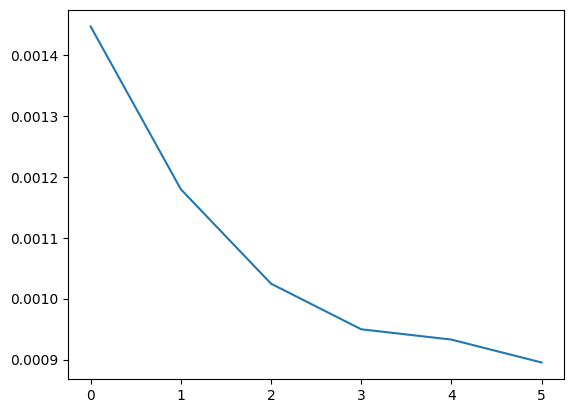

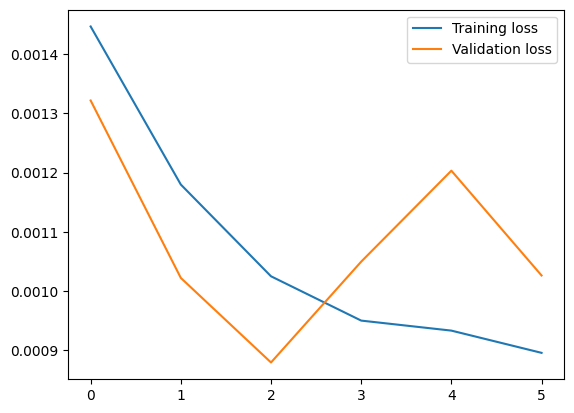

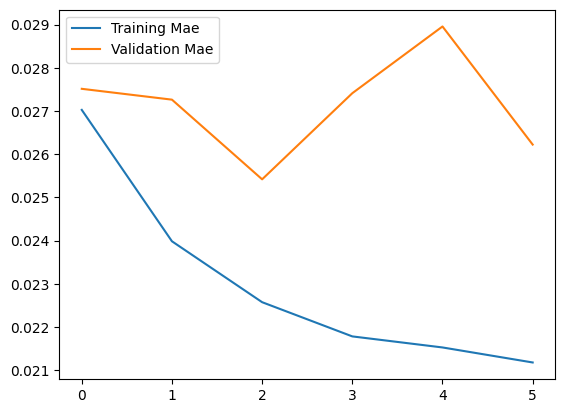

In [18]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

13644/13644 [==============================] - 116s 8ms/step


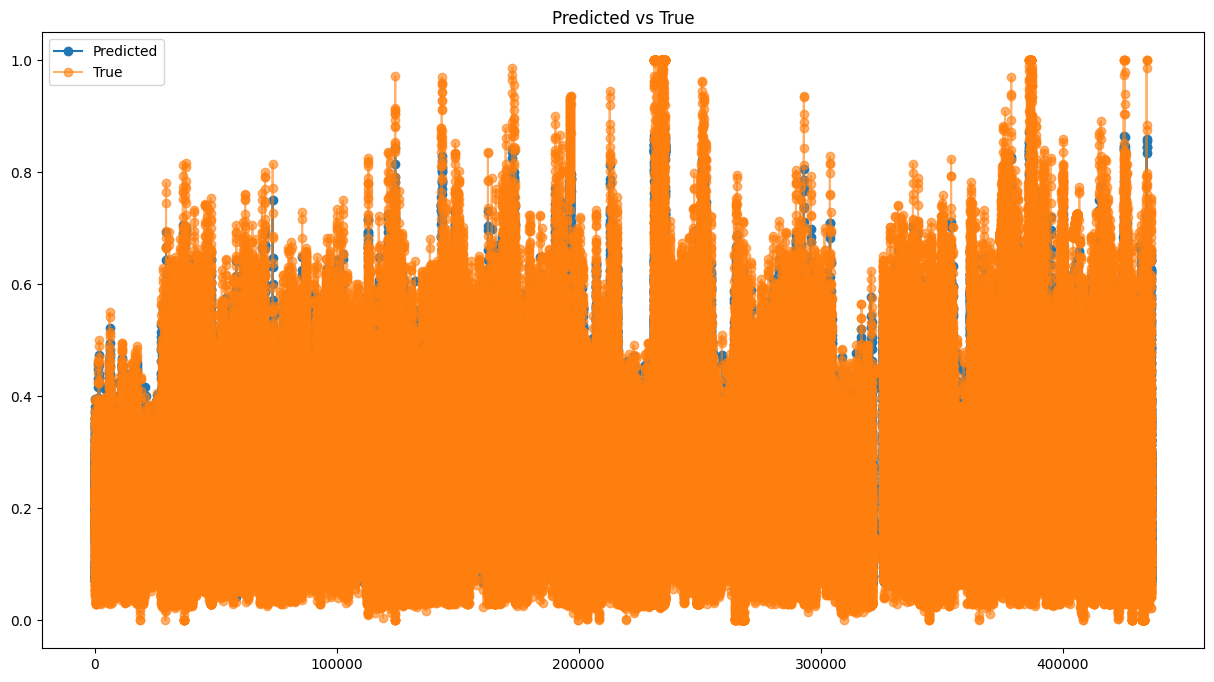

In [19]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [20]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.024329518215219798,
 'mse': 0.03043778762921123,
 'rmse': 0.0009264589157609641}

# Entrenamiento Vanilla LSTM sin dropout

In [21]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_nodrop(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 32)                4864      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 9,089
Trainable params: 9,089
Non-trainable params: 0
_________________________________________________________________


In [22]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/modeloGeneral/vanilla_NO_dropout.h5')

Epoch 1/50
14045/14045 [==============================] - 291s 21ms/step - loss: 3.1013e-04 - mae: 0.0109 - mse: 3.1013e-04 - val_loss: 2.6498e-04 - val_mae: 0.0120 - val_mse: 2.6498e-04
Epoch 2/50
13800/14045 [============================>.] - ETA: 4s - loss: 1.7599e-04 - mae: 0.0082 - mse: 1.7599e-04

KeyboardInterrupt: 

In [ ]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

In [ ]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [ ]:
model_utils.forecast_accuracy(yhat,array_Ytest)

# Entrenamiento Stacked LSTM sin dropout

In [ ]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Stacked(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

In [ ]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/modeloGeneral/stacked_dropout.h5')

In [ ]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

In [ ]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [ ]:
model_utils.forecast_accuracy(yhat,array_Ytest)

# Entrenamiento Stacked LSTM con dropout

In [ ]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Stacked_nodrop(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

In [ ]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/modeloGeneral/stacked_NO_dropout.h5')

In [ ]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

In [ ]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [ ]:
model_utils.forecast_accuracy(yhat,array_Ytest)

# Entrenamiento Bidirectional LSTM con dropout

In [ ]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Bidirectional(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

In [ ]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/modeloGeneral/bidirectional_dropout.h5')

In [ ]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

In [ ]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [ ]:
model_utils.forecast_accuracy(yhat,array_Ytest)

# Entrenamiento Bidirectional LSTM sin dropout

In [ ]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Bidirectional_nodrop(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

In [ ]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/modeloGeneral/bidirectional_NO_dropout.h5')

In [ ]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

In [ ]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [ ]:
model_utils.forecast_accuracy(yhat,array_Ytest)